# Assignment: Trees
Do three questions.

**Q1.** Please answer the following questions in your own words.

1. How are trees constructed?    
Decision trees predict outcomes for future inputs by dividing into a series of binary splits. These divisions then narrow down the possibilities and either return an outcome or redirect to another choice that will eventually lead to the response.  

1. How do trees handle non-linear relationships between variables? Compare this to linear models.   
While linear models try to model a situations using linear equations that can sometimes contain interactions or higher order terms for more complex relationships, trees do not operate in such a way and can be better at representing non-linear models. Because trees have many decision nodes they can represent more complex relationships and provide predictions that can truly fit with nuances of the data.   

3. Why is the Gini a good loss function for categorical target variables?     
The Gini impurity is a good function for this model as it calculates the probability for incorrectly classifying an input of the data. Since trees are made up of many splits that have to divide the data, with each split it is good to have a measure of its accuracy and the consequences of if it is inaccurate.   

4. Why do trees tend to overfit, and how can this tendency be constrained?     
Since trees create splits based on the characteristics of the data, they may often create too many and end up with a node for every single data point and have divisions for every small little distinction. You can work to resolve this by giving it a limit on the depth and how many decisions it can have so it does have some generalization to the data.  

5. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates.    
False, trees can also be effective when there are numerical features. Each decision of the tree does not have to be based on non-numeric features, and can instead create levels of the numeric variables and make decisions based on that.    

6. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?   
There are usually only two branches so the decisions can be binary. This makes the trees simpler and avoids creating overcomplicated models.   

7. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?   
You can determine how great the depth is and see if it makes sense for the data relative to how many outcomes there are. You can also check the gini purity of the final nodes to make sure it is not correcting too much. You can also have a limit on how many datapoints are at each end to ensure it is not becoming too overfit.   

**Q2.** This is a case study on regression and classification trees.

1. Load `./data/cars_hw.csv`. How many observations and features/covariates/variables? What are the available variables? Take a look at the first few rows of data.

In [23]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 

In [ ]:
cars = pd.read_csv('./data/cars_hw.csv')
cars.head() 

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [ ]:
cars.shape
#There are 11 variables and 977 observations. 

(976, 12)

2. For the categorical variables `Make`, `Color`, `Body_type`, `No_of_Owners`, `Fuel_Type`, `Transmission`, and `Transmission_Type`, create dummy/one-hot-encoded representations. For numeric variables, we'll use `Mileage_Run`, `Make_Year`, and `Seating_Capacity`. Our target variable will be `Price`. Make a train-test split of your data.

In [ ]:
y = cars["Price"]
X = cars.iloc[:, 1:11]
X=pd.get_dummies(X, columns=["Make", "Color","Body_Type","No_of_Owners","Fuel_Type","Transmission","Transmission_Type"])

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=100)

X.head()

,Make_Year,Mileage_Run,Seating_Capacity,Make_Chevrolet,Make_Datsun,Make_Ford,Make_Honda,Make_Hyundai,Make_Jeep,Make_Kia,...,Fuel_Type_diesel,Fuel_Type_petrol,Fuel_Type_petrol+cng,Transmission_4-Speed,Transmission_5-Speed,Transmission_6-Speed,Transmission_7-Speed,Transmission_CVT,Transmission_Type_Automatic,Transmission_Type_Manual
0,2017,44611,5,False,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,True,False
1,2016,20305,5,False,False,False,False,True,False,False,...,False,True,False,False,True,False,False,False,False,True
2,2019,29540,5,False,False,False,True,False,False,False,...,False,True,False,False,True,False,False,False,False,True
3,2017,35680,5,False,False,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,True
4,2017,25126,5,False,False,False,False,True,False,False,...,False,True,False,False,True,False,False,False,False,True


3. From `sklearn.tree`, import the `DecisionTreeRegressor` and `plot_tree`. Use a train-test split to iterate over possible values for `min_samples_leaf`, computing the $R^2$ for each value between 1 and 25. What choice achieves the highest $R^2$ on the test data?

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

scores = []

for i in range(1,26):
    model = DecisionTreeRegressor(min_samples_leaf=i)
    model = model.fit(X_train, y_train)
    y_hat = model.predict(X_test)
    r2 = model.score(X_test, y_test)
    scores.append(r2) 
    print(i, r2)

print(max(scores))
#The choice of min_samples_leaf that achieves the highest R^2 is a size of 1

1 0.8689929870416051
2 0.8202028549615481
3 0.8488960287516714
4 0.8026373273089262
5 0.8589894215771715
6 0.8343205205175523
7 0.7894740054603566
8 0.8092114876722174
9 0.7799912351769255
10 0.7812250975558228
11 0.7791935538511934
12 0.7735950324581872
13 0.774809061263565
14 0.7793363593916508
15 0.7820224643889232
16 0.7706234127085703
17 0.7798629633884796
18 0.7842082167400759
19 0.7860200906980761
20 0.7837611664745885
21 0.7794714536281813
22 0.7750841501132327
23 0.7762693156348456
24 0.7845920530431293
25 0.7832561965017845
0.8689929870416051


4. For the optimal `min_samples_leaf` from 3, regress price on the rest of the features/covariates using the training data. What is your $R^2$ and RMSE on the test set? Plot the dendrogram. Plot the residuals. Is the density of residuals symmetric and centered around 0?

In [18]:
cart = DecisionTreeRegressor(min_samples_leaf=3)
cart = cart.fit(X_train, y_train)
r2 = cart.score(X_test, y_test)
print(r2)

0.8441294756506512


[Text(0.6920186056225484, 0.9761904761904762, 'Body_Type_suv <= 0.5\nsquared_error = 134134093311.966\nsamples = 780\nvalue = 738983.333'),
 Text(0.45769695263693155, 0.9285714285714286, 'Body_Type_sedan <= 0.5\nsquared_error = 64005019978.978\nsamples = 606\nvalue = 622176.568'),
 Text(0.57485777912974, 0.9523809523809523, 'True  '),
 Text(0.260011078018306, 0.8809523809523809, 'Make_Year <= 2014.5\nsquared_error = 30704243593.605\nsamples = 435\nvalue = 543790.805'),
 Text(0.10395176521865465, 0.8333333333333334, 'Make_Year <= 2013.5\nsquared_error = 7532697629.943\nsamples = 121\nvalue = 383214.876'),
 Text(0.07075403167223594, 0.7857142857142857, 'Make_Volkswagen <= 0.5\nsquared_error = 6530648888.889\nsamples = 90\nvalue = 364466.667'),
 Text(0.06610489612087753, 0.7380952380952381, 'Make_Toyota <= 0.5\nsquared_error = 6339360553.633\nsamples = 85\nvalue = 359294.118'),
 Text(0.04561964259770449, 0.6904761904761905, 'Make_Year <= 2011.5\nsquared_error = 6421856753.725\nsamples = 7

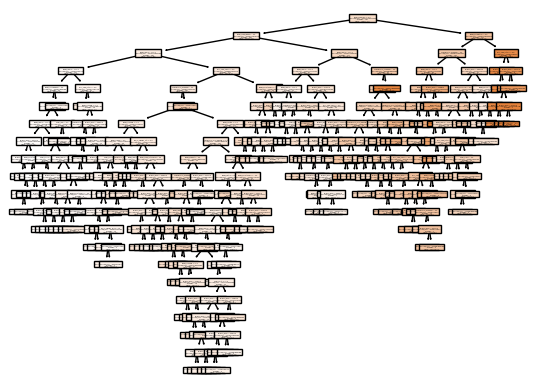

In [19]:
var_names = cart.feature_names_in_
plot_tree(cart,filled=True,feature_names=var_names) 

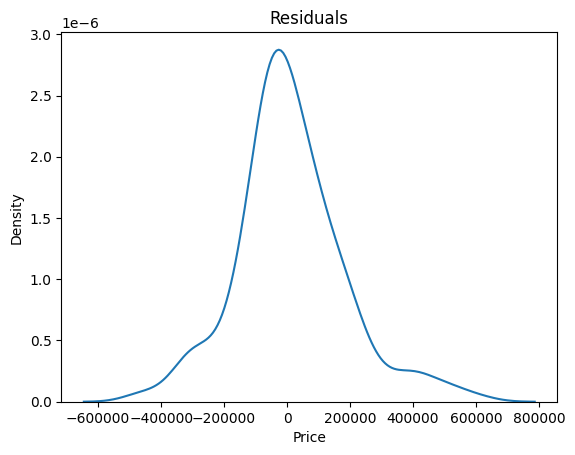

172513.53663265306


In [25]:
e = y_test - y_hat
sns.kdeplot(e).set(title='Residuals') 
plt.show() 

RMSE = np.sqrt(np.mean(e**2))
print(RMSE)
#The distribution of the residuals is mostly symmetric and centered around 0

4. Run a linear regression of price on the same variables. Which model -- regression tree or linear regression -- performs better on the test set? Why?

In [30]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
print(reg.score(X_test, y_test))
#The tree had an r^2 of 0.844 while the linear regression had a r^2 of 0.866
#It seems that the linear regression performs better on the test set
#This may be because the variables have a more linear relationship and are much better represented by this model

0.8661770915901528


5. Predict prices using both your tree and your linear model, and make a scatter plot of their values. Describe what you see. 

Text(0.5, 1.0, 'Decision Tree Prediction')

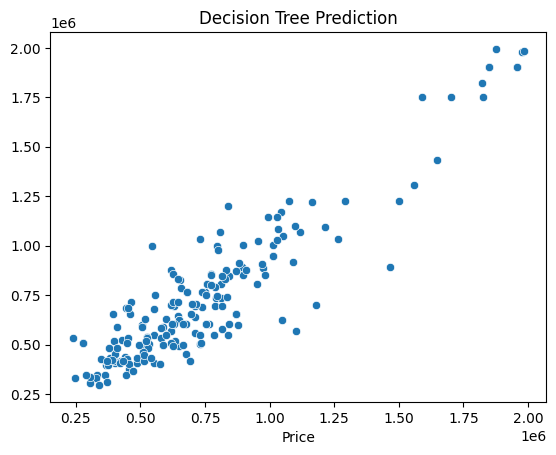

In [28]:
y_hat = cart.predict(X_test)
sns.scatterplot(x=y_test, y=y_hat)
plt.title("Decision Tree Prediction")

Text(0.5, 1.0, 'Linear Model Prediction')

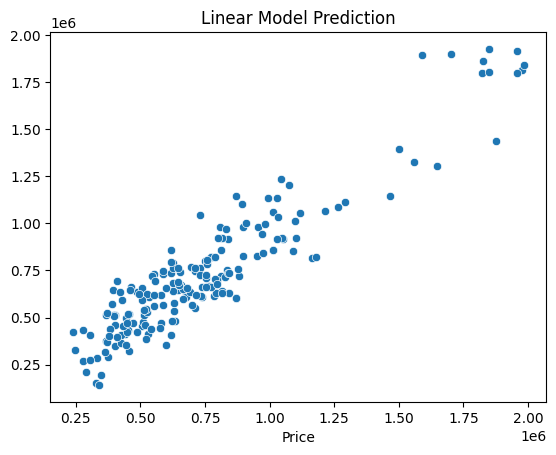

In [31]:
y_pred = reg.predict(X_test)
sns.scatterplot(x=y_test, y=y_pred)
plt.title("Linear Model Prediction")

Both of the scatterplots look very similar and have a generally positive trendline. However the Linear Model looks very linearly structured and in a rectangular area while for the Tree Model they are more scattered. This makes sense given the linear model is predicting things from the equation of a line whereas the other is coming from a tree. 

**Q3.** This is a case study about classification and regression trees.

1. Load the `Breast Cancer METABRIC.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  We'll use a consistent set of feature/explanatory variables. For numeric variables, we'll include `Tumor Size`, `Lymph nodes examined positive`, `Age at Diagnosis`. For categorical variables, we'll include `Tumor Stage`, `Chemotherapy`, and `Cancer Type Detailed`. One-hot-encode the categorical variables and concatenate them with the numeric variables into a feature/covariate matrix, $X$.

3. Let's predict `Overall Survival Status` given the features/covariates $X$. There are 528 missing values, unfortunately: Either drop those rows from your data or add them as a category to predict. Constrain the minimum samples per leaf to 10. Print a dendrogram of the tree. Print a confusion matrix of the algorithm's performance. What is the accuracy? 

4. For your model in part three, compute three statistics:
    - The **true positive rate** or **sensitivity**:
        $$
        TPR = \dfrac{TP}{TP+FN}
        $$
    - The **true negative rate** or **specificity**:
        $$
        TNR = \dfrac{TN}{TN+FP}
        $$
    Does your model tend to perform better with respect to one of these metrics?

5. Let's predict `Overall Survival (Months)` given the features/covariates $X$. Use the train/test split to pick the optimal `min_samples_leaf` value that gives the highest $R^2$ on the test set (it's about 110). What is the $R^2$? Plot the test values against the predicted values. How do you feel about this model for clinical purposes?

**Q4.** This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

In [ ]:
corp = pd.read_csv('./data/corporate_ratings.csv')
corp.shape #There are 30 variables and 2030 observations 

(2029, 31)

In [34]:
corp.head(3)

,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,A,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.945894,0.426395,0.099690,44.203245,...,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
1,BBB,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,1.033559,0.498234,0.203120,38.991156,...,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846
2,BBB,Whirlpool Corporation,WHR,Fitch Ratings,3/6/2015,Consumer Durables,0.963703,0.451505,0.122099,50.841385,...,0.214529,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510


2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

<Axes: >

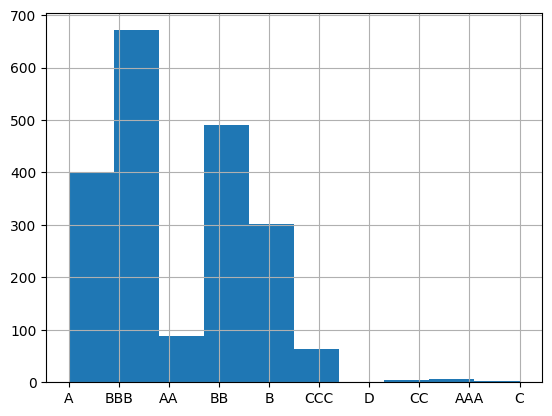

In [36]:
corp['Rating'].hist() 

In [ ]:
corp['Rating'] = corp['Rating'].replace(('AA', 'AAA'), 'A') #Collapse all redundant ratings
corp['Rating'] = corp['Rating'].replace(('BB', 'BBB'), 'B')
corp['Rating'] = corp['Rating'].replace(('CC', 'CCC'), 'C')
corp['Rating'].unique()

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$. 

In [ ]:
y = corp["Rating"]
X = corp.iloc[:, 5:31]
X=pd.get_dummies(X, columns=["Sector"])
X.head()

,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnCapitalEmployed,...,Sector_Consumer Durables,Sector_Consumer Non-Durables,Sector_Consumer Services,Sector_Energy,Sector_Finance,Sector_Health Care,Sector_Miscellaneous,Sector_Public Utilities,Sector_Technology,Sector_Transportation
0,0.945894,0.426395,0.099690,44.203245,0.037480,0.049351,0.176631,0.061510,0.041189,0.091514,...,True,False,False,False,False,False,False,False,False,False
1,1.033559,0.498234,0.203120,38.991156,0.044062,0.048857,0.175715,0.066546,0.053204,0.104800,...,True,False,False,False,False,False,False,False,False,False
2,0.963703,0.451505,0.122099,50.841385,0.032709,0.044334,0.170843,0.059783,0.032497,0.075955,...,True,False,False,False,False,False,False,False,False,False
3,1.019851,0.510402,0.176116,41.161738,0.020894,-0.012858,0.138059,0.042430,0.025690,-0.027015,...,True,False,False,False,False,False,False,False,False,False
4,0.957844,0.495432,0.141608,47.761126,0.042861,0.053770,0.177720,0.065354,0.046363,0.096945,...,True,False,False,False,False,False,False,False,False,False


4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

In [ ]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=100)

classif = DecisionTreeClassifier() 
classif = classif.fit(X, y) 
y_hat = classif.predict(X_test) 

tab = pd.crosstab(y_test,y_hat) 
acc = np.trace(tab)/len(y_test)
print('Accuracy: ', acc, '\n')
pd.crosstab(y_test,y_hat) 
#It looks like the predictions are quite good actually, there are not any that are misclassified. 

Accuracy:  1.0 



col_0,A,B,C,D
Rating,,,,
A,111,0,0,0
B,0,285,0,0
C,0,0,9,0
D,0,0,0,1


5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?

In [ ]:
X2 = corp.iloc[:, 3:31]
X2 = X2.drop(corp.columns[4], axis=1)
X2=pd.get_dummies(X2, columns=["Sector", "Rating Agency Name"])
X2.head()

X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y, test_size=.2, random_state=100)

classif2 = DecisionTreeClassifier() 
classif2 = classif2.fit(X2, y) 
y2_hat = classif2.predict(X2_test) 

tab2 = pd.crosstab(y2_test,y2_hat) 
acc2 = np.trace(tab2)/len(y2_test)
print('Accuracy: ', acc2, '\n')
pd.crosstab(y2_test,y2_hat) 
#It seems that the results do not change at all. I would have assumed they may change because different rating 
# agencies may have different ratings and be biased, but it does not seem like that is true. This may be due to 
# a mistake in creating the model. 

Accuracy:  1.0 



col_0,A,B,C,D
Rating,,,,
A,111,0,0,0
B,0,285,0,0
C,0,0,9,0
D,0,0,0,1


**Q5.** This is a case study about detecting fraud using classification trees. The goal is to predict the `class` variable, which is 0 for non-fraud and 1 for fraud.

1. Open `./data/creditcard_fraud.csv`. Print the number of observations and variables, and look at the first few rows of data. The variables are already normalized and de-identified, and are just called things like `V8` to protect the privacy of the clients.

2. Print a table of counts for the `class` variable and make a histogram. What percentage of transactions are fraudulent?

3. Drop `Time` and make a decision tree classifier to predict fraud. Print a confusion table and compute the accuracy. This is a serious **class imbalance** problem: The minority class is so small that essentially predicting 0's for all cases will achieve an extremely high accuracy. There are over-sampling techniques to deal with this issue, but we don't have time to cover them in class.

4. Imagine that you block every transaction in the test set labelled as fraudulent. How much money is (1) saved that should be saved, (2) lost to fraud anyway, (3) withheld in error from customers? Does implementing this anti-fraud system seem like a good idea, or not? Why?

5. Instead of predicting fraud, predict loss: Multiple the `Class` variable times the `Amount` variable, and call it `Loss`. Predict it using a decision tree regressor (making sure to drop Class, Time, and Loss from the features/covariates/predictors). What $R^2$ and RMSE do you get? Make a scatterplot of the predicted values on the test group versus the actual test values. Do you notice any interesting patterns? How could you use this algorithm to decide which transactions to block, and why?


**Q6.** Show that any decision tree is equivalent to a linear regression on a set of dummy variables that represent the optimal splits in the tree. 

Hint: You can think of CART as partitioning the feature space into a set of sets $\{S_1, S_2, ..., S_K\}$, and then predicting the average for all of the observations in each set $S_k$, $m_k$:
$$
\hat{y}(x) = \sum_{k=1}^K \mathbb{I}\{ x \text{ is in } S_k \} m_k
$$
where $\mathbb{I} \{ P(x,k)\}$ takes the value 1 if the proposition $P(x,k)$ is true and 0 otherwise. Now, doesn't that look like least-squares regression on a set of dummy/one-hot-encoded variables?

Conversely, can any linear regression be represented by a tree?